In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [201]:
df = pd.read_csv('data/dataframe_for_model.csv')
df.shape

(12491, 11)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   12491 non-null  int64  
 1   Bedrooms                     12491 non-null  int64  
 2   Bathrooms                    12491 non-null  float64
 3   Total interior livable area  12491 non-null  float64
 4   Elementary School Score      12491 non-null  float64
 5   Middle School Score          12491 non-null  float64
 6   High School Score            12491 non-null  float64
 7   Tax assessed value           12491 non-null  float64
 8   Annual tax amount            12491 non-null  float64
 9   Listed Price                 12491 non-null  float64
 10  City                         12491 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 1.0+ MB


## # Visualize Data

<Figure size 720x432 with 0 Axes>

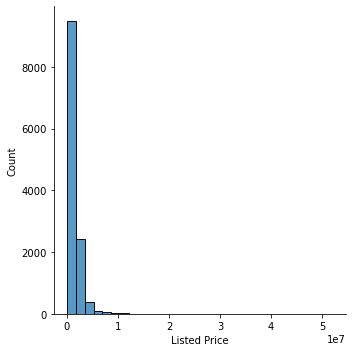

In [335]:
# Displot: to see where listed price are.
plt.figure(figsize=(10,6))
sns.displot(house_data['Listed Price'], bins=30)

In [138]:
cities_df = pd.read_csv('cities_coord.csv')
cities_df

,City,Latitude,Longitude
0,Acampo,38.174640,-121.278559
1,Aguanga,33.442809,-116.865024
2,Alameda,37.609029,-121.899142
3,Alamo,37.850203,-122.032184
4,Albany,37.886870,-122.297747
...,...,...,...
397,Yolo,38.718454,-121.905900
398,Yorba Linda,33.890110,-117.824971
399,Yountville,38.402201,-122.359506
400,Yuba City,39.140448,-121.616911


In [139]:
cities_df = cities_df.set_index('City')

In [140]:
cities_df

,Latitude,Longitude
City,,
Acampo,38.174640,-121.278559
Aguanga,33.442809,-116.865024
Alameda,37.609029,-121.899142
Alamo,37.850203,-122.032184
Albany,37.886870,-122.297747
...,...,...
Yolo,38.718454,-121.905900
Yorba Linda,33.890110,-117.824971
Yountville,38.402201,-122.359506


In [203]:
df2 = df[df["Listed Price"] < 2000000].copy()

In [204]:
len(df2)

10471

### Beginning

In [142]:
df[['Lat', 'Long']] = cities_df.loc[df["City"]].values
df

,Unnamed: 0,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,City,Lat,Long
0,1,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,Los Angeles,34.053691,-118.242766
1,3,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,Culver City,34.021122,-118.396466
2,10,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,Santa Clara,37.233325,-121.684635
3,12,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,San Francisco,37.779026,-122.419906
4,18,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,San Mateo,37.496904,-122.333057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,47425,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,San Jose,37.336166,-121.890591
12487,47427,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,Villa Park,33.814754,-117.820623
12488,47436,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,Los Angeles,34.053691,-118.242766
12489,47437,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,Elk Grove,38.408799,-121.371618


In [205]:
df2[['Lat', 'Long']] = cities_df.loc[df2["City"]].values
df2

,Unnamed: 0,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,City,Lat,Long
0,1,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,Los Angeles,34.053691,-118.242766
1,3,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,Culver City,34.021122,-118.396466
2,10,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,Santa Clara,37.233325,-121.684635
5,23,3,2.0,1350.0,9.0,9.0,6.0,442672.0,6434.0,1499000.0,San Carlos,37.504936,-122.261823
6,26,5,3.0,1910.0,8.0,5.0,6.0,974854.0,13610.0,1098000.0,San Jose,37.336166,-121.890591
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12484,47421,4,2.0,1807.0,5.0,8.0,8.0,102824.0,1589.0,1988000.0,Sunnyvale,37.368830,-122.036349
12485,47422,2,1.0,830.0,7.0,3.0,7.0,351789.0,4571.0,335000.0,Whittier,33.970878,-118.030839
12486,47425,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,San Jose,37.336166,-121.890591
12489,47437,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,Elk Grove,38.408799,-121.371618


In [206]:
df2 = df2.drop(columns=["Unnamed: 0", "City"])
df2

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,Lat,Long
0,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,34.053691,-118.242766
1,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,34.021122,-118.396466
2,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,37.233325,-121.684635
5,3,2.0,1350.0,9.0,9.0,6.0,442672.0,6434.0,1499000.0,37.504936,-122.261823
6,5,3.0,1910.0,8.0,5.0,6.0,974854.0,13610.0,1098000.0,37.336166,-121.890591
...,...,...,...,...,...,...,...,...,...,...,...
12484,4,2.0,1807.0,5.0,8.0,8.0,102824.0,1589.0,1988000.0,37.368830,-122.036349
12485,2,1.0,830.0,7.0,3.0,7.0,351789.0,4571.0,335000.0,33.970878,-118.030839
12486,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,37.336166,-121.890591
12489,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,38.408799,-121.371618


In [143]:
df = df.drop(columns=["Unnamed: 0", "City"])
df

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,Lat,Long
0,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,34.053691,-118.242766
1,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,34.021122,-118.396466
2,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,37.233325,-121.684635
3,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,37.779026,-122.419906
4,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,37.496904,-122.333057
...,...,...,...,...,...,...,...,...,...,...,...
12486,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,37.336166,-121.890591
12487,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,33.814754,-117.820623
12488,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,34.053691,-118.242766
12489,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,38.408799,-121.371618


In [144]:
df = df[[col for col in df.columns if col != "Listed Price"] + ["Listed Price"]]

In [207]:
df2 = df2[[col for col in df2.columns if col != "Listed Price"] + ["Listed Price"]]

In [145]:
df

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Lat,Long,Listed Price
0,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,34.053691,-118.242766,525000.0
1,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,34.021122,-118.396466,1895000.0
2,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,37.233325,-121.684635,1428000.0
3,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,37.779026,-122.419906,2250000.0
4,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,37.496904,-122.333057,2390000.0
...,...,...,...,...,...,...,...,...,...,...,...
12486,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,37.336166,-121.890591,1224888.0
12487,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,33.814754,-117.820623,2569000.0
12488,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,34.053691,-118.242766,2295000.0
12489,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,38.408799,-121.371618,499888.0


<AxesSubplot:>

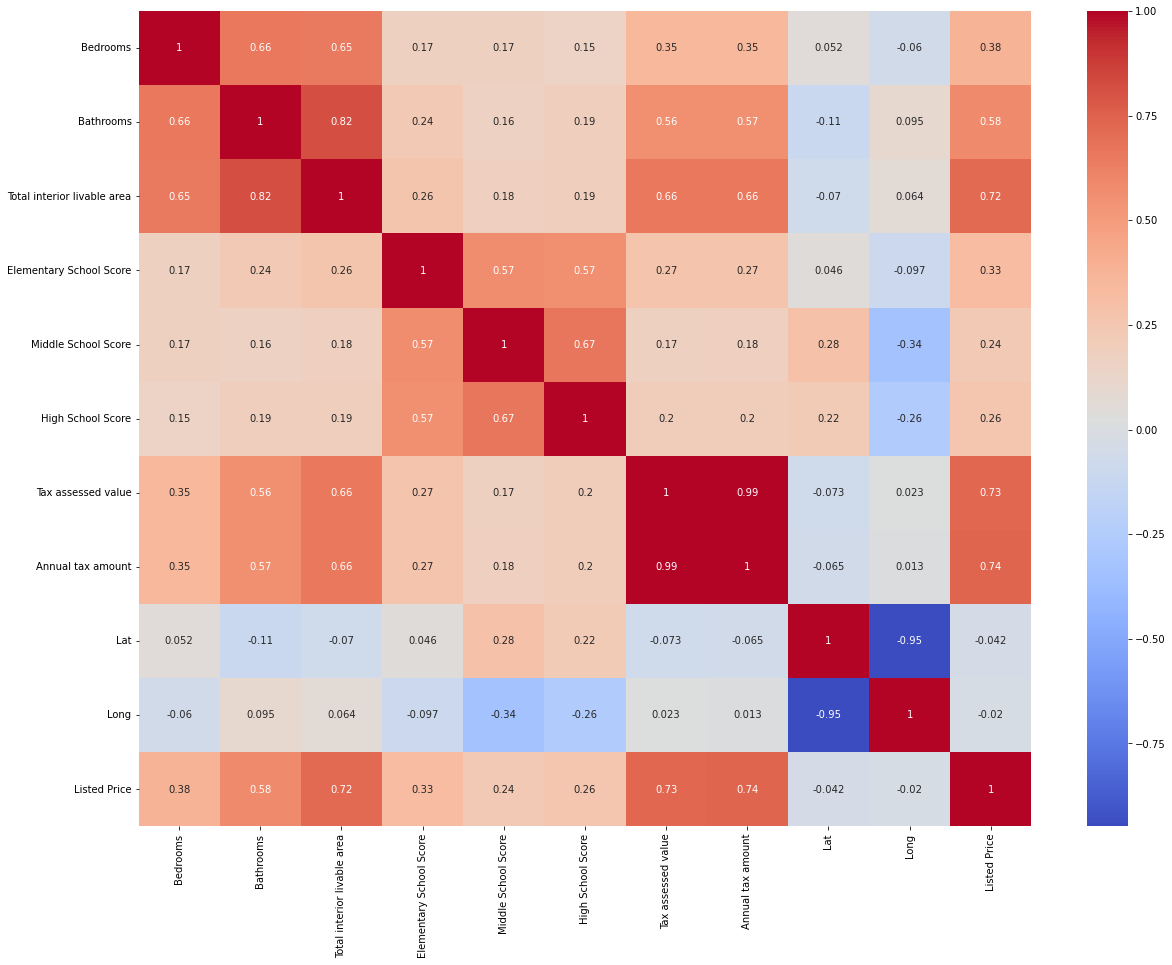

In [146]:
plt.figure(figsize=(20,15))
corr_df = df
corr_matrix = corr_df.corr()
sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True)

In [147]:
corr_df.corr()

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Lat,Long,Listed Price
Bedrooms,1.000000,0.664999,0.650652,0.172413,0.174654,0.151257,0.347476,0.352713,0.051669,-0.060280,0.380291
Bathrooms,0.664999,1.000000,0.821484,0.238471,0.156335,0.190858,0.563337,0.565125,-0.106936,0.095313,0.581575
Total interior livable area,0.650652,0.821484,1.000000,0.263878,0.183738,0.191260,0.658369,0.661445,-0.069992,0.064478,0.722175
Elementary School Score,0.172413,0.238471,0.263878,1.000000,0.573396,0.565706,0.269621,0.274350,0.046046,-0.096726,0.325513
Middle School Score,0.174654,0.156335,0.183738,0.573396,1.000000,0.670688,0.174684,0.179406,0.284660,-0.337332,0.237118
High School Score,0.151257,0.190858,0.191260,0.565706,0.670688,1.000000,0.197454,0.199316,0.217210,-0.256868,0.260657
Tax assessed value,0.347476,0.563337,0.658369,0.269621,0.174684,0.197454,1.000000,0.992971,-0.072893,0.023370,0.730762
Annual tax amount,0.352713,0.565125,0.661445,0.274350,0.179406,0.199316,0.992971,1.000000,-0.065380,0.013198,0.739566
Lat,0.051669,-0.106936,-0.069992,0.046046,0.284660,0.217210,-0.072893,-0.065380,1.000000,-0.948380,-0.042089
Long,-0.060280,0.095313,0.064478,-0.096726,-0.337332,-0.256868,0.023370,0.013198,-0.948380,1.000000,-0.020320


In [148]:
X = df.drop(columns=["Listed Price"])
y = df["Listed Price"]

In [208]:
X = df2.drop(columns=["Listed Price"])
y = df2["Listed Price"]

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)
print(X_train.shape)
print(X_test.shape)

(8376, 10)
(2095, 10)


In [210]:
X_train

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Lat,Long
11362,5,2.0,2038.0,7.0,9.0,8.0,83811.0,2391.0,37.336166,-121.890591
10604,3,2.0,1646.0,2.0,5.0,5.0,106414.0,1354.0,37.130408,-121.654497
6365,3,3.0,896.0,4.0,5.0,4.0,118021.0,1546.0,34.053691,-118.242766
499,1,2.0,862.0,4.0,6.0,7.0,129348.0,1780.0,34.053691,-118.242766
1373,4,4.0,2292.0,9.0,9.0,10.0,1826060.0,22780.0,37.263832,-122.023015
...,...,...,...,...,...,...,...,...,...,...
11202,4,2.0,2361.0,8.0,7.0,8.0,841175.0,11310.0,37.694552,-122.085743
60,1,1.0,500.0,7.0,6.0,6.0,14711.0,159.0,37.050096,-121.990591
10782,3,3.0,1684.0,5.0,6.0,8.0,352000.0,4421.0,34.058840,-117.109606
7195,4,2.0,2507.0,8.0,7.0,3.0,1750289.0,21767.0,37.779026,-122.419906


In [189]:
y_test[y_test < 3000000]

3995     1799500.0
5794      425000.0
10122    1195000.0
1157      925000.0
8033      935000.0
           ...    
3342      409900.0
351      1530000.0
7480     1659000.0
1069      998000.0
10438    1695000.0
Name: Listed Price, Length: 2345, dtype: float64

In [188]:
len(y_pred[y_pred < 3000000])

2329

In [161]:
df[3995:4000]

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Lat,Long,Listed Price
3995,4,3.0,3137.0,8.0,9.0,9.0,1292317.0,15399.0,37.433227,-121.898925,1799500.0
3996,2,1.0,824.0,4.0,7.0,6.0,44994.0,692.0,34.053691,-118.242766,799000.0
3997,3,2.0,1164.0,6.0,5.0,8.0,329675.0,4515.0,32.972695,-116.688124,699000.0
3998,3,2.0,1694.0,5.0,4.0,5.0,826914.0,9150.0,38.402201,-122.359506,1225000.0
3999,2,1.0,772.0,6.0,3.0,3.0,220343.0,4086.0,33.894927,-118.226624,405500.0


In [211]:
random_forest = RandomForestRegressor(n_estimators=200, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [212]:
y_pred = random_forest.predict(X_test)
print(y_pred)

[ 278523.    1036362.6    488251.38  ...  550984.985 1074071.98
  573304.65 ]


In [213]:
print(r2_score(y_test, y_pred)) # calculating r-score
print(f'Testing MSE error is: {round(mean_squared_error(y_pred, y_test),4)}') # testing MSE

0.817667982224024
Testing MSE error is: 43596312508.7719


In [227]:
cut = 100

In [228]:
min_value = min(y_test[:cut])
max_value = max(y_test[:cut])
steps = (max_value - min_value) / cut

y_grid = np.arange(min_value, max_value, steps)
y_grid = y_grid.reshape((len(y_grid), 1))
print(len(y_grid))

100


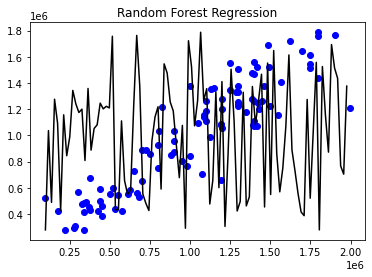

In [229]:
#plt.scatter(X_test, y_test, color='red')

plt.scatter(y_test[:cut], y_pred[:cut], color='blue')
plt.plot(y_grid, y_pred[:cut], color='black')
plt.title("Random Forest Regression")
plt.show()

## GridSearchCV to try to increase R2 score

In [230]:
grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3,4,5,6,7],
    'random_state': [18]
}

In [231]:
print(datetime.now())

cv_rfr = GridSearchCV(estimator=RandomForestRegressor(),
                     param_grid=grid, cv=5)

cv_rfr.fit(X_train, y_train)

# Show end time
print(datetime.now())



2022-06-02 12:45:34.478437
2022-06-02 12:51:00.921439


In [173]:
cv_rfr.best_estimator_

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=200,
                      random_state=18)

In [176]:
rf2_model = RandomForestRegressor(n_estimators=200, random_state=18,
                                 max_depth=7, max_features='sqrt')

rf2_model.fit(X_train, y_train)
y_pred_2 = rf2_model.predict(X_test)

In [177]:
y_pred_2

array([2019676.809085  ,  567705.05092094, 2037473.56604329, ...,
       1618468.3710685 ,  818099.634946  , 1687973.95125229])

In [178]:
print(r2_score(y_test, y_pred_2)) # calculating r-score
print(f'Testing MSE error is: {round(mean_squared_error(y_pred_2, y_test),4)}') # testing MSE

0.6361779429791037
Testing MSE error is: 1107952637248.6968


## Worse Results